In [1]:
import pickle
from bland_altman import bland_altman_plot
from pearson_correlation import r_squared_vesselWall, r_squared_Lumen
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
path_predMasks = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/preds.npy'
path_gtMasks = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/gts.npy'
path_gtScans = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/inputs.npy'

path_Diameter_lumen_mask = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/Diameter_lumen/Diameter_mask_arr.npy'
path_Diameter_lumen_ref = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/Diameter_lumen/Diameter_ref_arr.npy'
path_Diameter_vesel_wall_mask = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/Diameter_vesel_wall/Diameter_mask_arr.npy'
path_Diameter_vesel_wall_ref = '/home/amos/2D_UNet__Invivo_Keras/post_processing_version2/Diameter_vesel_wall/Diameter_ref_arr.npy'

data_gtScans = pickle.load(open(path_gtScans, 'rb'))
data_gtMasks = pickle.load(open(path_gtMasks, 'rb'))
data_predMasks = pickle.load(open(path_predMasks, 'rb'))

data_Diameter_lumen_mask = pickle.load(open(path_Diameter_lumen_mask, 'rb'))
data_Diameter_lumen_ref = pickle.load(open(path_Diameter_lumen_ref, 'rb'))
data_Diameter_vesel_wall_mask = pickle.load(open(path_Diameter_vesel_wall_mask, 'rb'))
data_Diameter_vesel_wall_ref = pickle.load(open(path_Diameter_vesel_wall_ref, 'rb'))

In [3]:
data_Diameter_lumen_mask = np.array(data_Diameter_lumen_mask)
data_Diameter_lumen_ref = np.array(data_Diameter_lumen_ref)

In [4]:
data_Diameter_vesel_wall_mask = np.array(data_Diameter_vesel_wall_mask)
data_Diameter_vesel_wall_ref = np.array(data_Diameter_vesel_wall_ref)

# Bland Altman

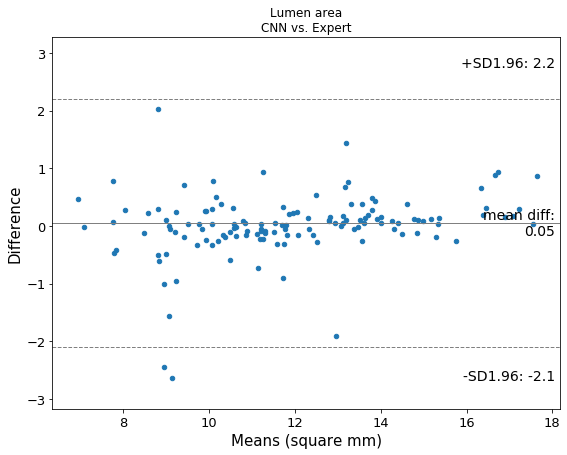

In [5]:
f, ax = plt.subplots(1, figsize =(8,6))
my_bland_altman_plot = bland_altman_plot(data_Diameter_lumen_mask, data_Diameter_lumen_ref, ax = ax)
plt.title('Lumen area\nCNN vs. Expert')
f.savefig('bland-altman-plot-lumen.png')

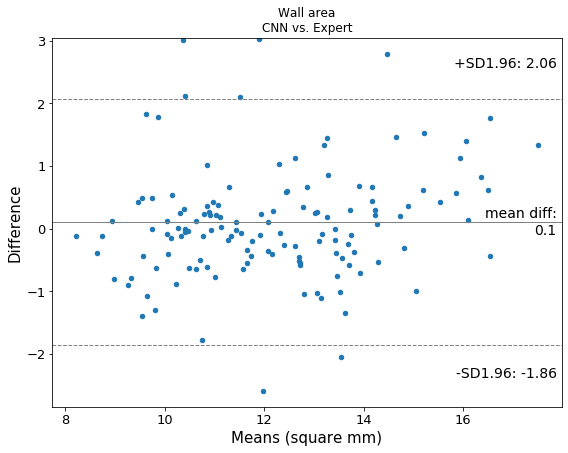

In [6]:
f, ax = plt.subplots(1, figsize =(8,6))
my_bland_altman_plot = bland_altman_plot(data_Diameter_vesel_wall_mask, data_Diameter_vesel_wall_ref, ax = ax)
plt.title('Wall area\nCNN vs. Expert')
f.savefig('bland-altman-plot-vesel-wall.png')

# Pearson's Correlation

0.8875355597504713


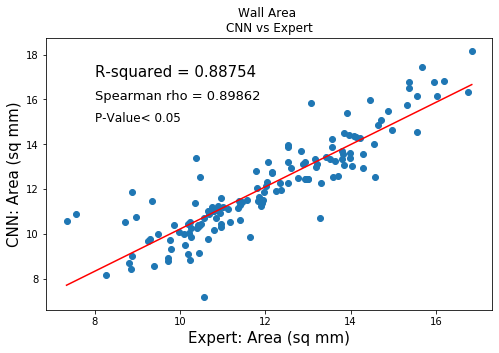

In [7]:
f,ax = plt.subplots(1, figsize=(8,5))
my_pearson_plot = r_squared_vesselWall(data_Diameter_vesel_wall_ref, data_Diameter_vesel_wall_mask)


pearson's correlation:0.9113046771309941


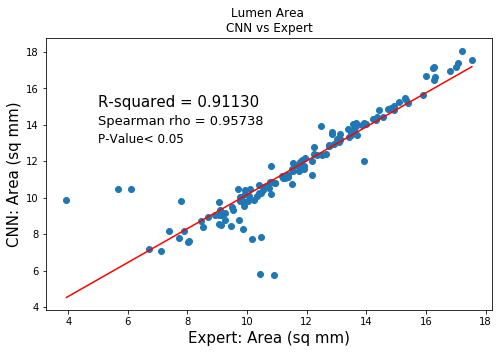

In [8]:
f,ax = plt.subplots(1, figsize=(8,5))
my_pearson_plot = r_squared_Lumen(data_Diameter_lumen_ref, data_Diameter_lumen_mask)